In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
dataset = pd.read_csv('train.csv')

In [40]:
dataset.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [41]:
dataset.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [42]:
dataset.shape

(456548, 9)

In [43]:
dataset.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [44]:
fulfilment=pd.read_csv('fulfilment_center_info.csv')

In [45]:
fulfilment.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [46]:
fulfilment.shape

(77, 5)

In [47]:
fulfilment.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [48]:
meal=pd.read_csv('meal_info.csv')

In [49]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [50]:
meal.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [51]:
final_dataset=dataset.merge(fulfilment,on='center_id',how='left').merge(meal,on='meal_id',how='left')

In [52]:
final_dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [53]:
final_dataset.shape

(456548, 15)

In [54]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [55]:
final_dataset.drop(['id','center_id','meal_id'],inplace=True,axis=1)

In [56]:
final_dataset.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'city_code', 'region_code',
       'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [57]:
final_dataset.category.unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Soup', 'Salad', 'Fish'], dtype=object)

In [58]:
final_dataset[final_dataset['week'] == 1]

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...
2917,1,242.50,242.50,0,0,42,473,77,TYPE_A,4.5,Other Snacks,Thai
2918,1,242.50,275.51,0,0,107,473,77,TYPE_A,4.5,Other Snacks,Thai
2919,1,445.23,445.23,0,0,28,473,77,TYPE_A,4.5,Desert,Indian
2920,1,503.43,503.43,0,0,69,473,77,TYPE_A,4.5,Desert,Indian


In [84]:
unique_rows = final_dataset[final_dataset['week'] == 7].drop_duplicates(subset='category', keep='first')

In [85]:
unique_rows

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
17311,7,145.53,146.53,0,0,148,647,56,TYPE_C,2.0,Beverages,Thai
17320,7,162.02,309.43,1,1,1770,647,56,TYPE_C,2.0,Rice Bowl,Indian
17323,7,241.53,242.53,0,0,27,647,56,TYPE_C,2.0,Starters,Thai
17324,7,338.53,338.53,0,0,15,647,56,TYPE_C,2.0,Pasta,Italian
17326,7,306.58,306.58,0,0,229,647,56,TYPE_C,2.0,Sandwich,Italian
17329,7,445.23,445.23,0,0,26,647,56,TYPE_C,2.0,Biryani,Indian
17330,7,177.51,319.13,0,0,121,647,56,TYPE_C,2.0,Extras,Thai
17333,7,634.41,635.41,0,0,68,647,56,TYPE_C,2.0,Pizza,Continental
17336,7,669.33,668.33,0,0,42,647,56,TYPE_C,2.0,Seafood,Continental
17337,7,291.03,290.03,0,0,40,647,56,TYPE_C,2.0,Other Snacks,Thai


In [86]:
array_of_objects = unique_rows.apply(lambda row: {'category': row['category'], 'num_orders': row['num_orders']}, axis=1).tolist()

In [87]:
array_of_objects

[{'category': 'Beverages', 'num_orders': 148},
 {'category': 'Rice Bowl', 'num_orders': 1770},
 {'category': 'Starters', 'num_orders': 27},
 {'category': 'Pasta', 'num_orders': 15},
 {'category': 'Sandwich', 'num_orders': 229},
 {'category': 'Biryani', 'num_orders': 26},
 {'category': 'Extras', 'num_orders': 121},
 {'category': 'Pizza', 'num_orders': 68},
 {'category': 'Seafood', 'num_orders': 42},
 {'category': 'Other Snacks', 'num_orders': 40},
 {'category': 'Desert', 'num_orders': 40},
 {'category': 'Soup', 'num_orders': 40}]

In [25]:
from sklearn.preprocessing import  LabelEncoder

In [26]:
le= LabelEncoder()
final_dataset["center_type_trans"]=le.fit_transform(final_dataset["center_type"])
final_dataset["category_trans"]=le.fit_transform(final_dataset["category"])
final_dataset["cuisine_trans"]=le.fit_transform(final_dataset["cuisine"])

In [27]:
final_dataset.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,center_type_trans,category_trans,cuisine_trans
0,1,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,2,0,3
1,1,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,2,0,3
2,1,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,2,0,3
3,1,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,2,0,1
4,1,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,2,0,1


In [28]:
print(final_dataset['center_type'].unique())
print(final_dataset['category'].unique())
print(final_dataset['cuisine'].unique())
print(final_dataset['center_type_trans'].unique())
print(final_dataset['category_trans'].unique())
print(final_dataset['cuisine_trans'].unique())

['TYPE_C' 'TYPE_B' 'TYPE_A']
['Beverages' 'Rice Bowl' 'Starters' 'Pasta' 'Sandwich' 'Biryani' 'Extras'
 'Pizza' 'Seafood' 'Other Snacks' 'Desert' 'Soup' 'Salad' 'Fish']
['Thai' 'Indian' 'Italian' 'Continental']
[2 1 0]
[ 0  8 13  6 10  1  3  7 11  5  2 12  9  4]
[3 1 2 0]


In [30]:
final_dataset.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'city_code', 'region_code',
       'center_type', 'op_area', 'category', 'cuisine', 'center_type_trans',
       'category_trans', 'cuisine_trans'],
      dtype='object')

In [31]:
final_dataset.drop(['center_type','category','cuisine'],inplace=True,axis=1)

In [32]:
updated_dataset=final_dataset[['category_trans','cuisine_trans','week','checkout_price','base_price','emailer_for_promotion','homepage_featured','city_code','region_code','op_area','center_type_trans','num_orders']]

In [33]:
updated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   category_trans         456548 non-null  int32  
 1   cuisine_trans          456548 non-null  int32  
 2   week                   456548 non-null  int64  
 3   checkout_price         456548 non-null  float64
 4   base_price             456548 non-null  float64
 5   emailer_for_promotion  456548 non-null  int64  
 6   homepage_featured      456548 non-null  int64  
 7   city_code              456548 non-null  int64  
 8   region_code            456548 non-null  int64  
 9   op_area                456548 non-null  float64
 10  center_type_trans      456548 non-null  int32  
 11  num_orders             456548 non-null  int64  
dtypes: float64(3), int32(3), int64(6)
memory usage: 36.6 MB


In [34]:
from sklearn.model_selection import train_test_split
X=updated_dataset.iloc[:,0:-1]
Y=updated_dataset.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [35]:
X

,category_trans,cuisine_trans,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_trans
0,0,3,1,136.83,152.29,0,0,647,56,2.0,2
1,0,3,1,136.83,135.83,0,0,647,56,2.0,2
2,0,3,1,134.86,135.86,0,0,647,56,2.0,2
3,0,1,1,339.50,437.53,0,0,647,56,2.0,2
4,0,1,1,243.50,242.50,0,0,647,56,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...
456543,2,1,145,484.09,484.09,0,0,473,77,4.5,0
456544,2,1,145,482.09,482.09,0,0,473,77,4.5,0
456545,9,2,145,237.68,321.07,0,0,473,77,4.5,0
456546,9,2,145,243.50,313.34,0,0,473,77,4.5,0


In [37]:
Y

0         177
1         270
2         189
3          54
4          40
         ... 
456543     68
456544     42
456545    501
456546    729
456547    162
Name: num_orders, Length: 456548, dtype: int64

In [32]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 11)
model.fit(X_train, Y_train)
model_pred=model.predict(X_test)
model_predt=model.predict(X_train)
model_rmse_score = np.sqrt(mean_squared_error(Y_test, model_pred))
model_rmse_scoret= np.sqrt(mean_squared_error(Y_train,model_predt))
model_rsquared_score = r2_score(Y_test, model_pred)
model_mae=mean_absolute_error(Y_test,model_pred)
print("MODEL GRADIENT BOOST REGRESSION")
print('RMSE score for test:', model_rmse_score)
print('RMSE score for train:', model_rmse_scoret)
print('R2 score:', model_rsquared_score)
print('MAE score:', model_mae)
print('Variance score test:', model.score(X_test, Y_test))
print('Variance score train:', model.score(X_train, Y_train))


MODEL GRADIENT BOOST REGRESSION
RMSE score for test: 160.3930195021782
RMSE score for train: 106.2878874845307
R2 score: 0.8332784430588183
MAE score: 80.369454327045
Variance score test: 0.8332784430588183
Variance score train: 0.9284105365172142


In [36]:
#crossvalidation on model
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
model_r2_scores= model_selection.cross_val_score(model, X_test, Y_test, scoring="r2", cv=model_selection.KFold(n_splits=10, random_state=5,shuffle=True))
print("R2 SCORES MEAN",model_r2_scores.mean())

R2 SCORES MEAN 0.784059475113712


In [37]:
import pickle
file=open('gradientboostmodel.pkl','wb')
pickle.dump(model,file)

In [48]:
Y_pred=model.predict(X_test)
Y_pred.shape

(136965,)

(136965,)

In [40]:
np.array(Y_pred)

array([  75.03439166,  216.8412507 ,  221.57009213, ..., 1128.84250369,
        229.01163251,  298.48697442])

In [41]:
np.array(Y_test)

array([ 28, 176, 391, ..., 972, 242, 352], dtype=int64)

In [43]:
model.score(X_train,Y_train)

0.9284105365172142

In [44]:
model.score(X_test,Y_test)

0.8332784430588183

In [51]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()
    return

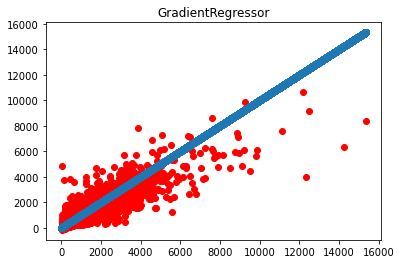

In [52]:
plotGraph(Y_test,Y_pred,"GradientRegressor")